In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import tflearn
import numpy as np
import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
% matplotlib inline

In [18]:
# set parameters 
step_radians = 0.001
steps_of_history = 10
steps_in_future = 1
learning_rate = 0.003

In [5]:
# making data creation a function can enable us to costmize the length of data
def getData(x):
    seq = []
    next_val = []
    for i in range(0, len(x)-steps_of_history-steps_in_future,steps_in_future):
        seq.append(x[i:i+steps_of_history])
        next_val.append(x[i+steps_of_history+steps_in_future-1])
    seq = np.reshape(seq, [-1,steps_of_history,1])
    next_val = np.reshape(next_val,[-1,1])
    X = np.array(seq)
    Y = np.array(next_val)
    return X, Y

In [6]:
# evaluating the reslults by plotting
def plotFig(actual,predicted,error):
    #plot the results
    plt.figure(figsize=(20,4))
    plt.suptitle('Prediction')
    plt.title('History = '+str(steps_of_history)+',Future = '+str(steps_in_future)+', Error = '+str(error*100)+'%')
    plt.plot(actual,'r-',label='Expected')
    plt.plot(predicted,'g.',label='Predicted')
    plt.legend()
    plt.show()

In [7]:
# making the building of network a function can enable us to perform multiple tests at once. alse specifying a results measure of error.
def myRNN(activator, optimizer):
    tf.reset_default_graph()
    #net work building
    net = tflearn.input_data(shape=[None, steps_of_history,1])
    net = tflearn.lstm(net,32,dropout=0.8,bias=True)
    net = tflearn.fully_connected(net,1,activation=activator)
    net = tflearn.regression(net, optimizer=optimizer,loss='mean_square',learning_rate=learning_rate)
    
    #training data
    trainVal = np.sin(np.arange(0,20*math.pi,step_radians))
    trainX,trainY = getData(trainVal)
    print(np.shape(trainX))
    
    #training
    model = tflearn.DNN(net)
    model.fit(trainX,trainY,n_epoch=10,validation_set=0.1,batch_size=128,show_metric=True)
    
    #testing data
    testVal = np.sin(np.arange(20*math.pi,24*math.pi,step_radians))
    testX,testY = getData(testVal)
    
    #predict the future values
    predictY = model.predict(testX)
    
    expected = np.array(testY).flatten()
    predicted = np.array(predictY).flatten()
    error = sum(((expected - predicted)**2)/len(expected))
    
    return error, testY, predictY
    #plot and save figure
    #plotFig(testY,np.array(predictY).flatten(),error,activator+"_"+optimizer)

In [16]:
# train and tune the model at the same time. finding out which combinations of activators and optimizers have the best results
def main():
    activators = ['linear','tanh','sigmoid','softmax','softplus','softsign','relu','relu6','leaky_relu','prelu','elu']
    optimizers = ['sgd','rmsprop','adam','momentum','adagrad','ftrl','adadelta']
    errors = []
    testYs = []
    predictYs = []
    activatorss = []
    optimizerss = []
    
    for activator in activators:
        for optimizer in optimizers:
            print("Running for :" + activator + " & " + optimizer)
            error,testY,predictY=myRNN(activator, optimizer)
            errors.append(error)
            testYs.append(testY)
            predictYs.append(predictY)
            activatorss.append(activator)
            optimizerss.append(optimizer)
            
    for i in range(len(errors)):
        print(activatorss[i],optimizerss[i])
        plotFig(testYs[i],np.array(predictYs[i]).flatten(),errors[i])

Training Step: 889  | total loss: 0.49029 | time: 1.930s
| AdaDelta | epoch: 010 | loss: 0.49029 - binary_acc: 0.0000 -- iter: 11264/11307
Training Step: 890  | total loss: 0.49196 | time: 2.959s
| AdaDelta | epoch: 010 | loss: 0.49196 - binary_acc: 0.0000 | val_loss: 0.48783 - val_acc: 0.0008 -- iter: 11307/11307
--
linear sgd


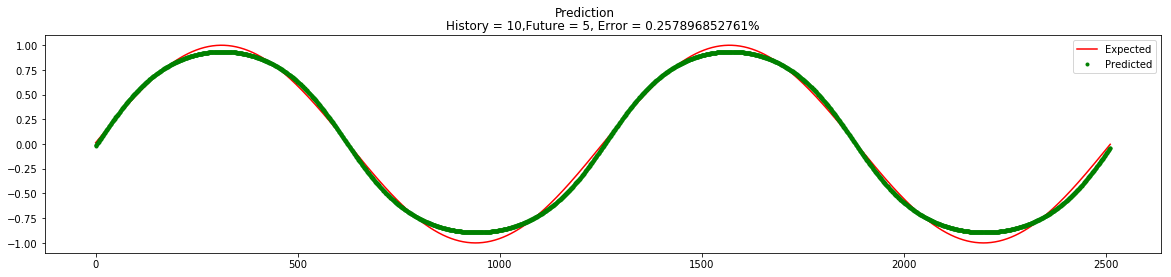

linear rmsprop


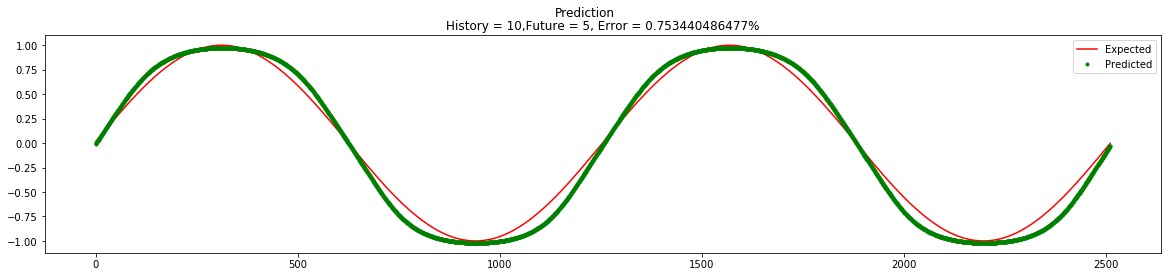

linear adam


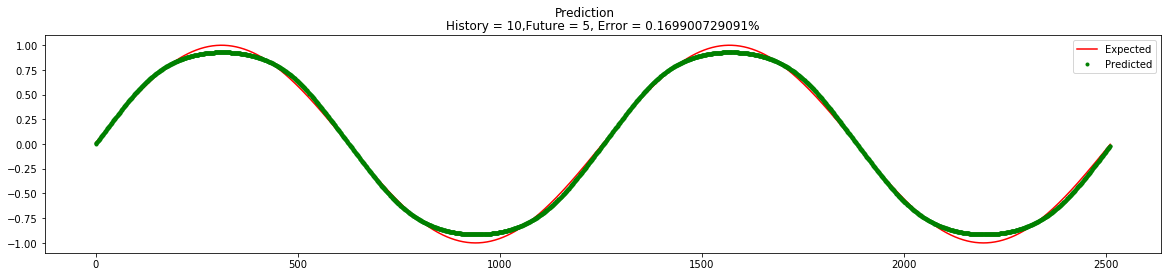

linear momentum


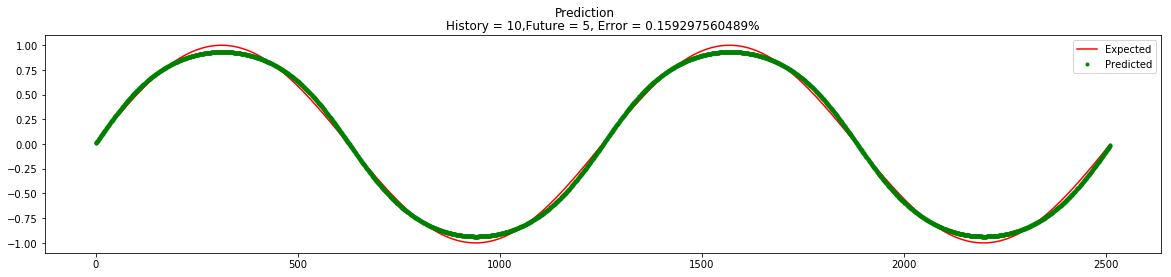

linear adagrad


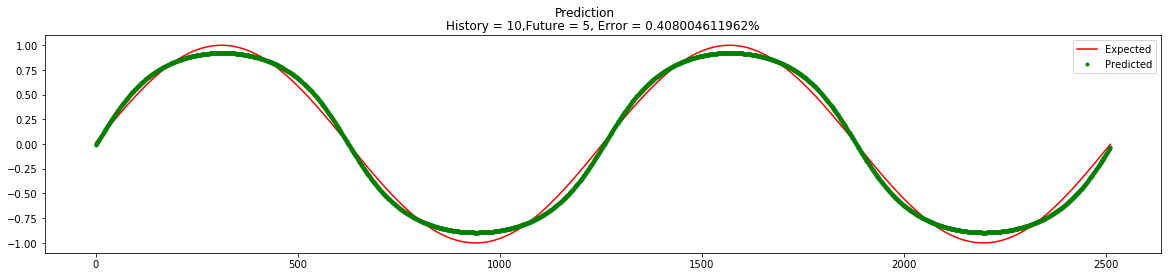

linear ftrl


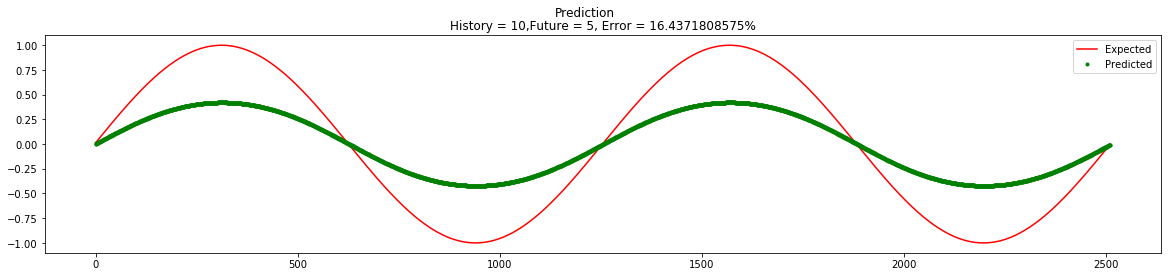

linear adadelta


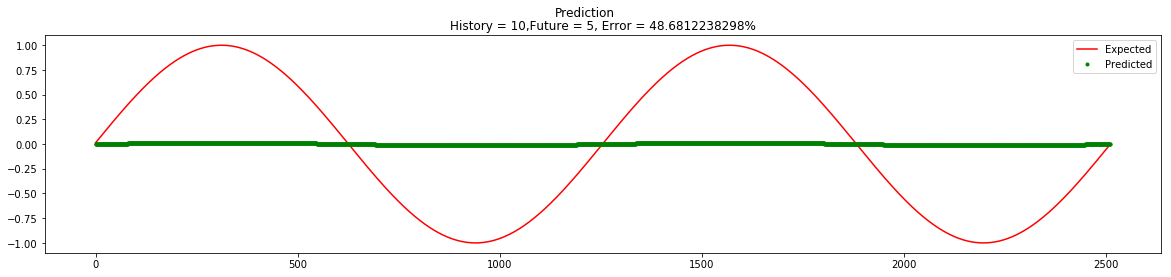

tanh sgd


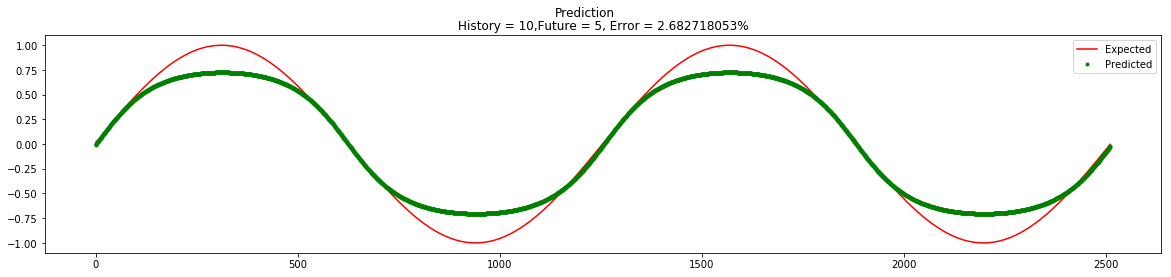

tanh rmsprop


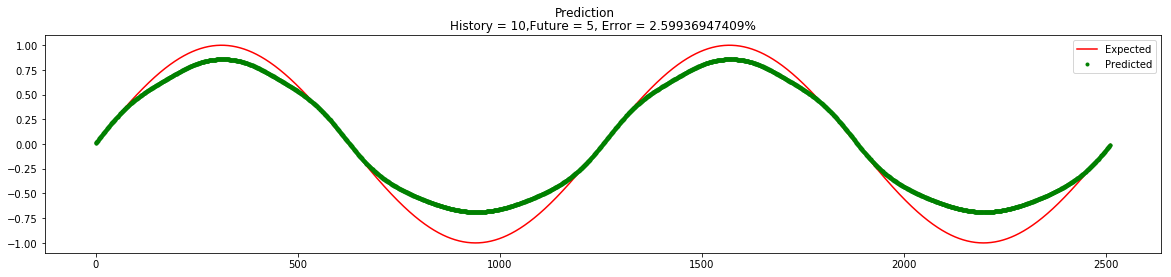

tanh adam


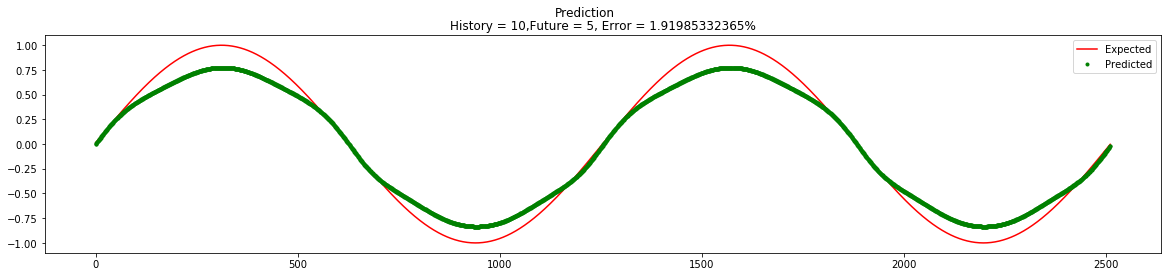

tanh momentum


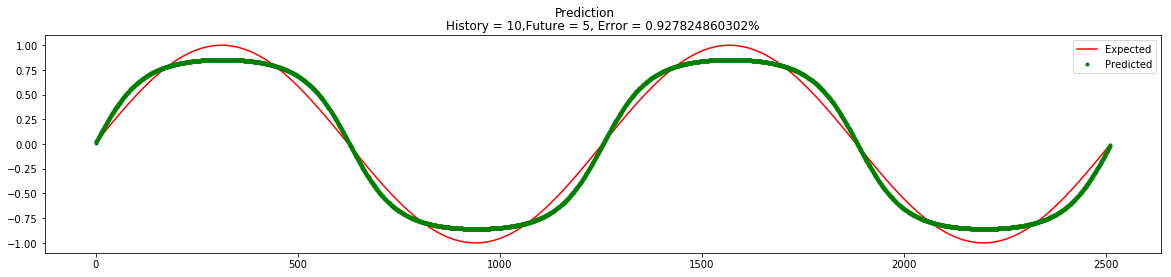

tanh adagrad


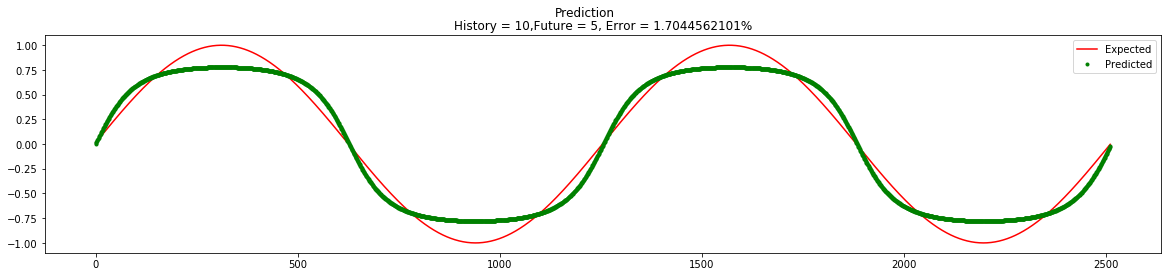

tanh ftrl


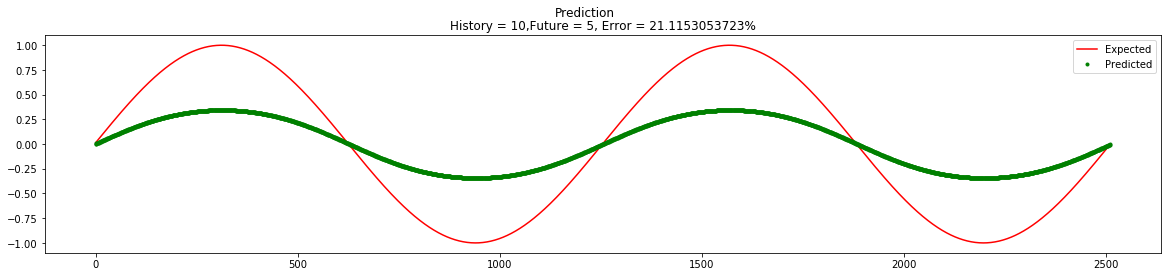

tanh adadelta


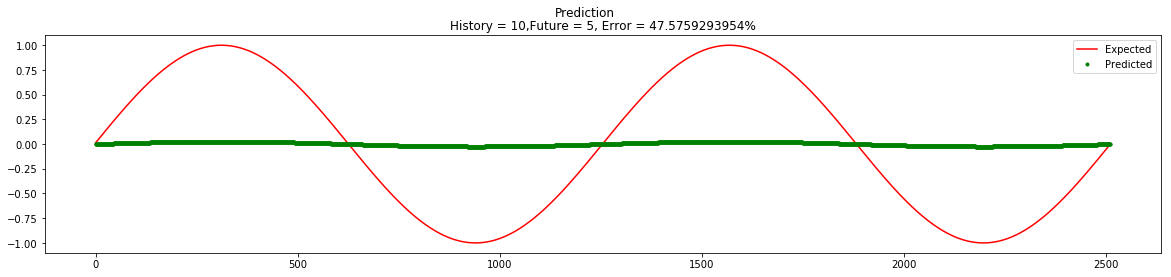

sigmoid sgd


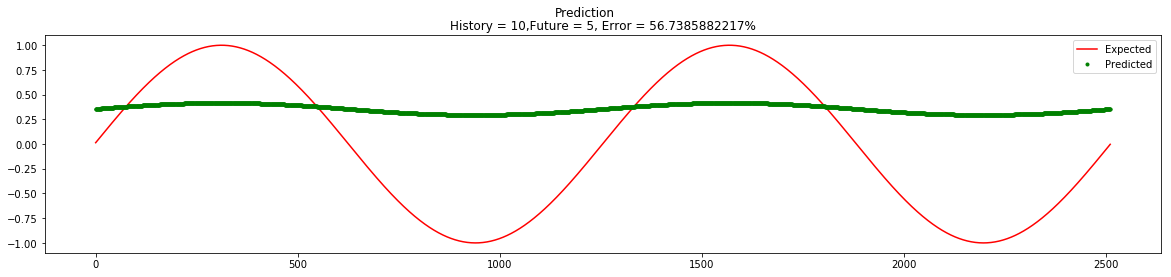

sigmoid rmsprop


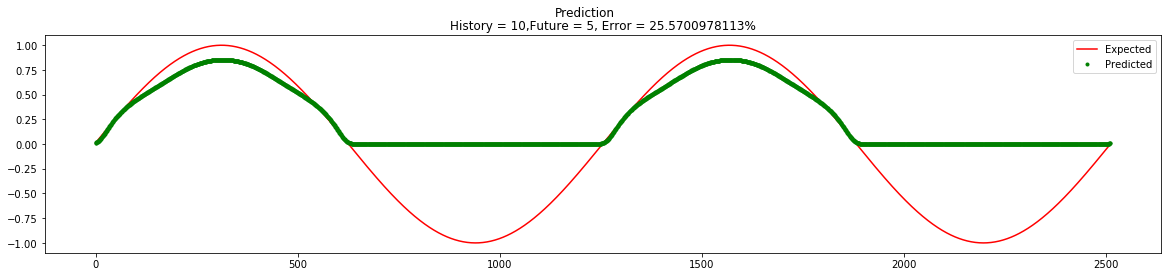

sigmoid adam


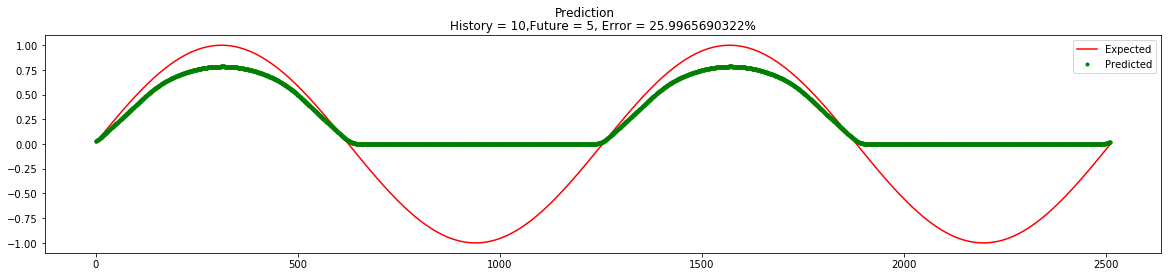

sigmoid momentum


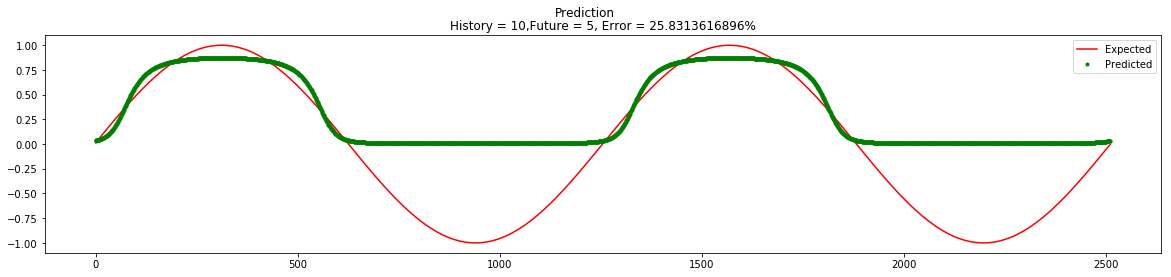

sigmoid adagrad


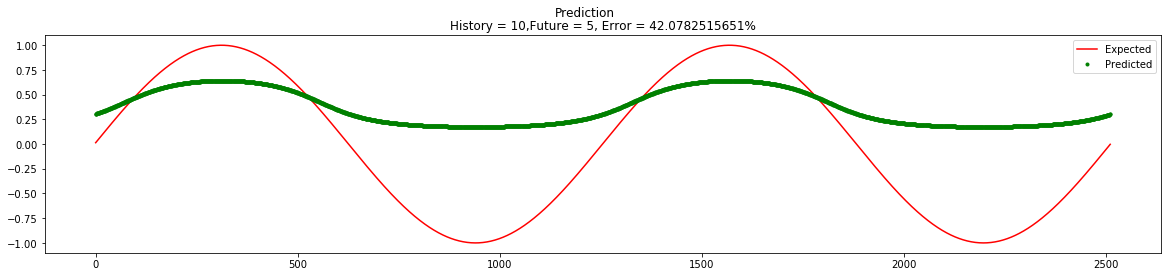

sigmoid ftrl


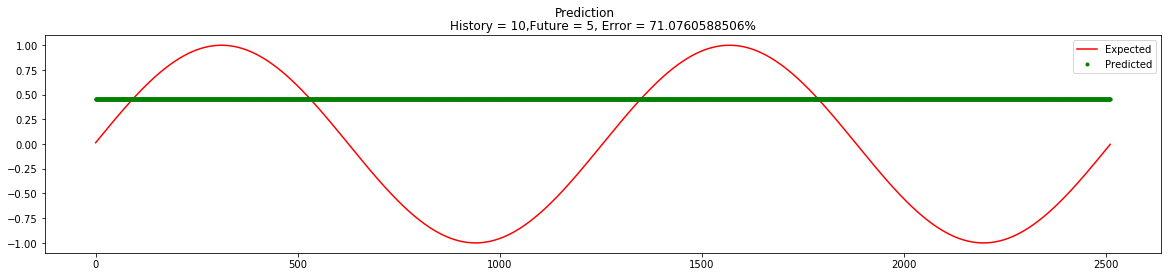

sigmoid adadelta


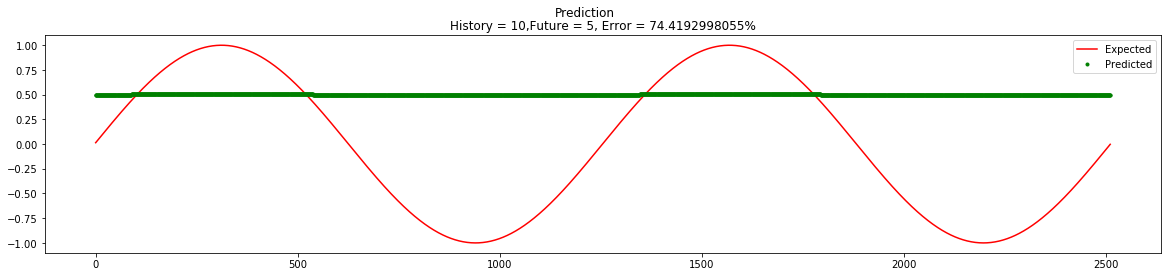

softmax sgd


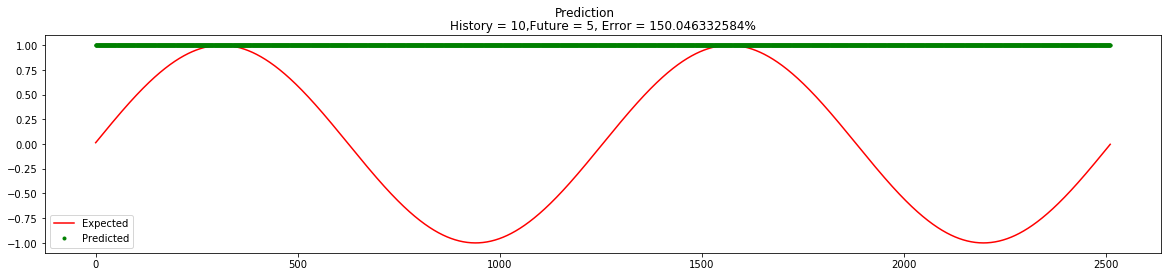

softmax rmsprop


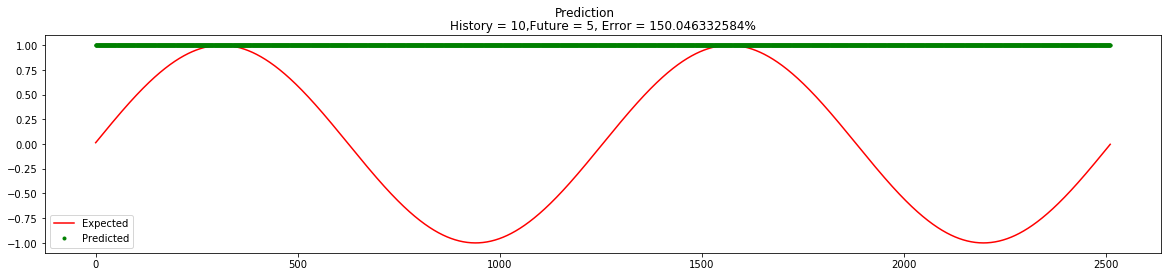

softmax adam


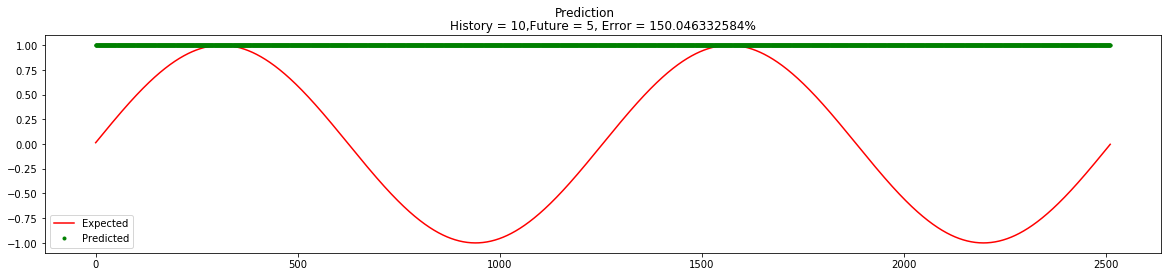

softmax momentum


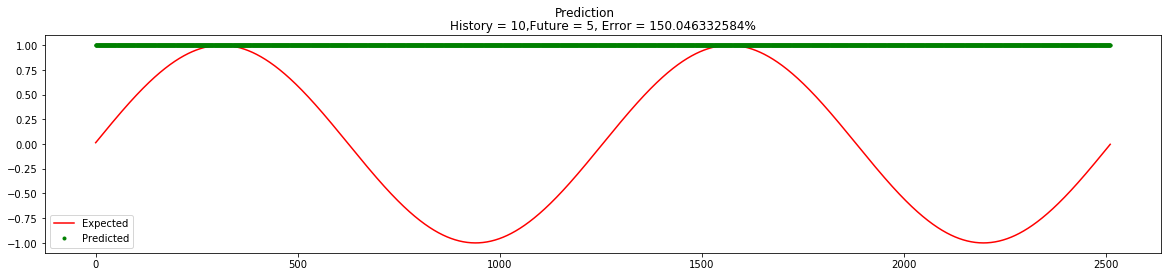

softmax adagrad


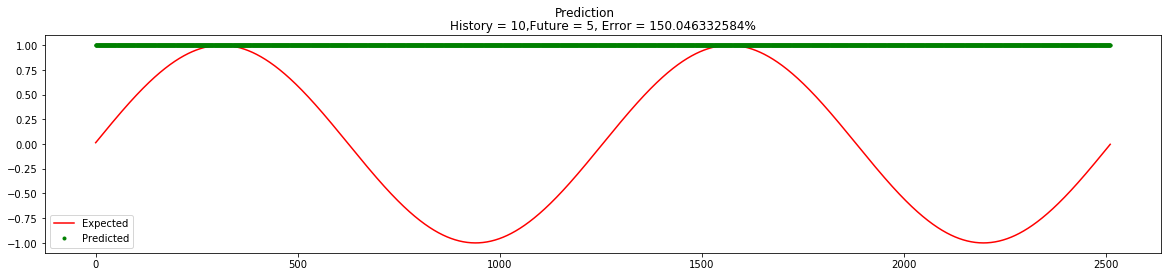

softmax ftrl


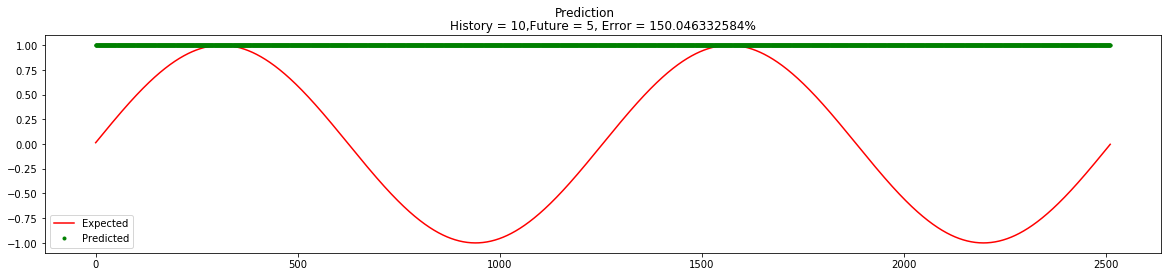

softmax adadelta


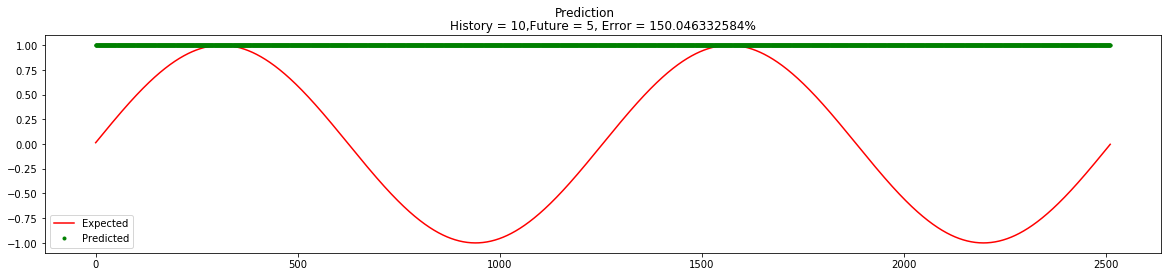

softplus sgd


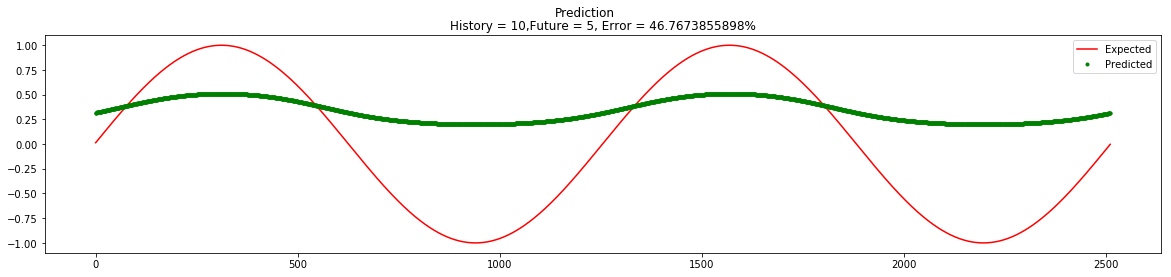

softplus rmsprop


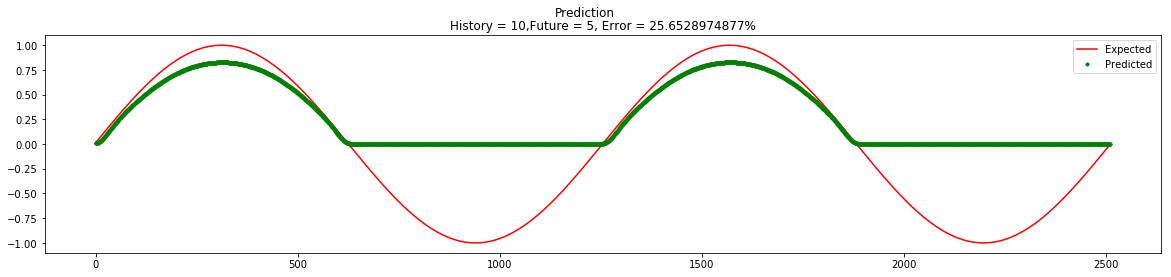

softplus adam


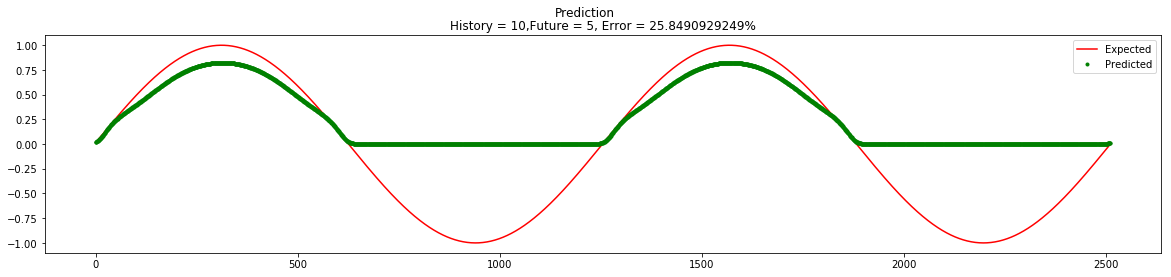

softplus momentum


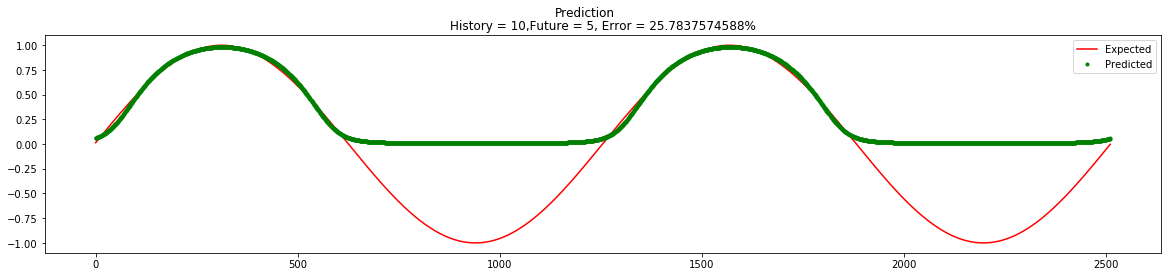

softplus adagrad


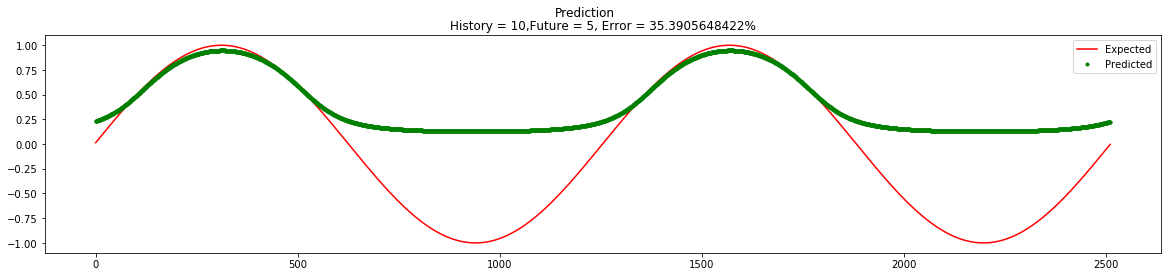

softplus ftrl


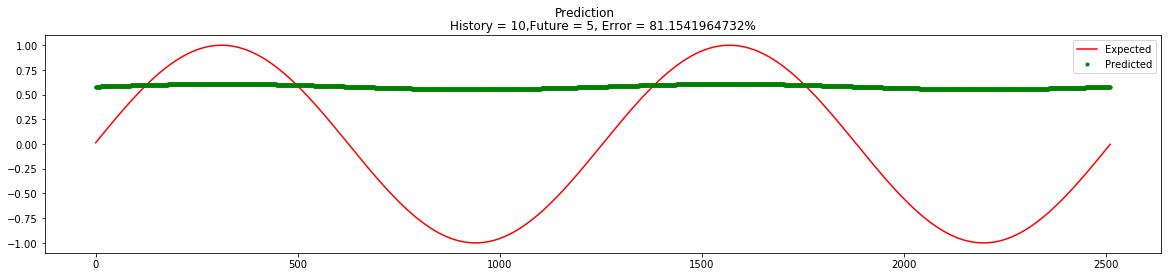

softplus adadelta


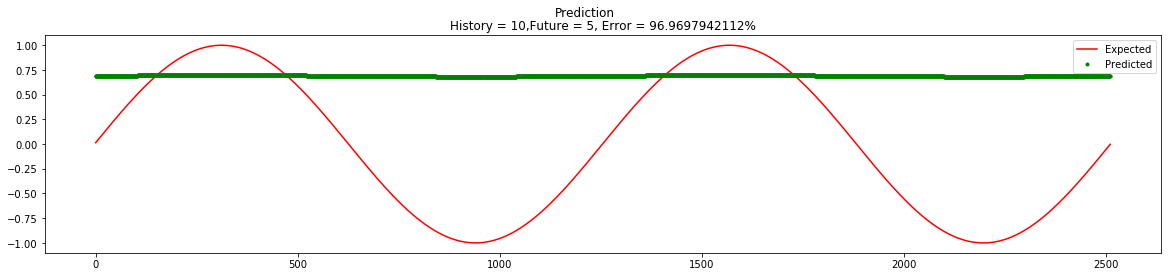

softsign sgd


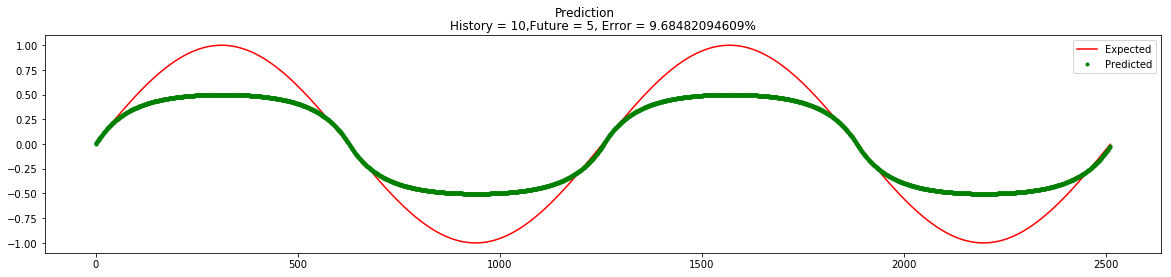

softsign rmsprop


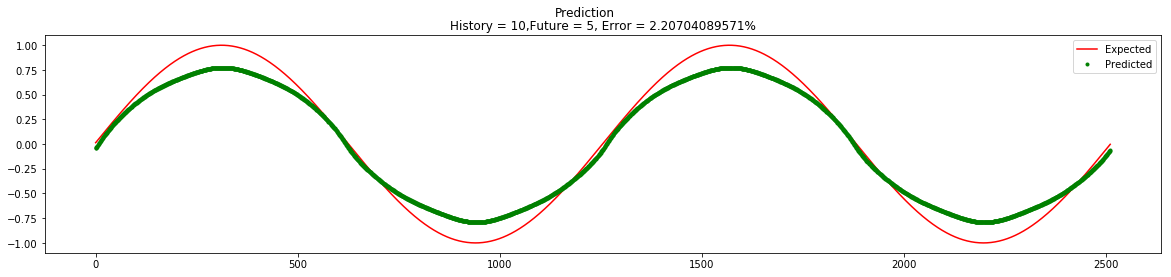

softsign adam


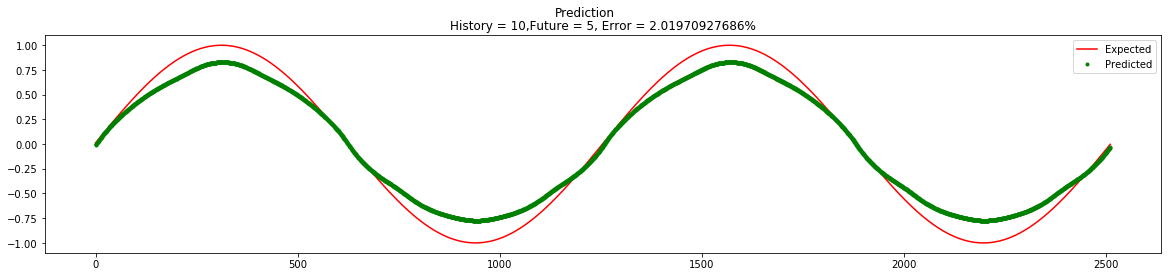

softsign momentum


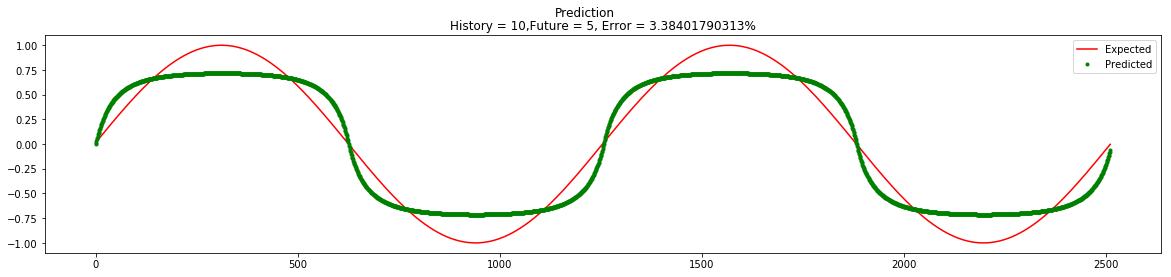

softsign adagrad


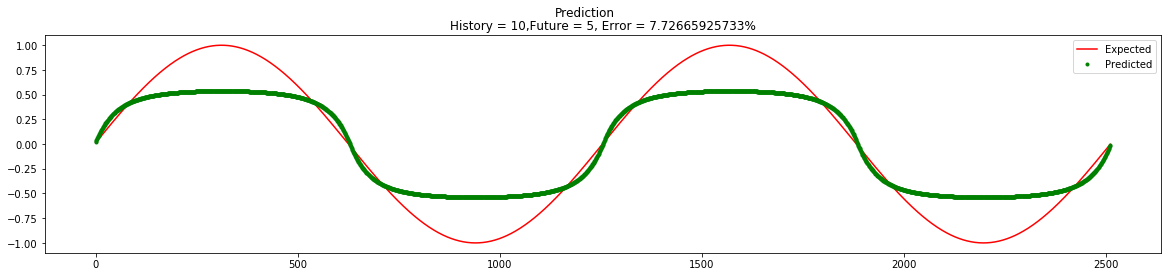

softsign ftrl


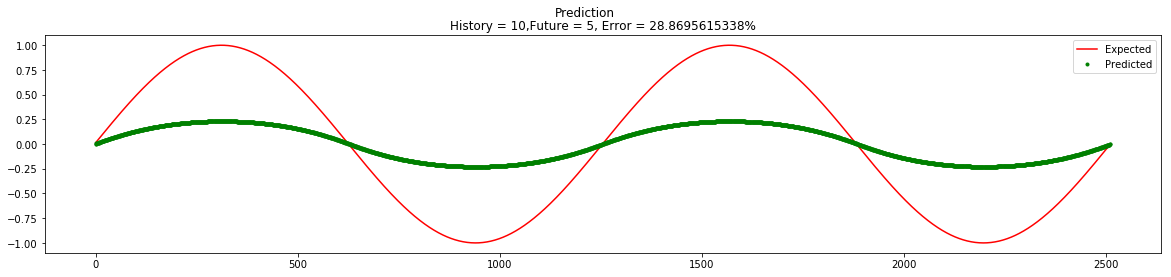

softsign adadelta


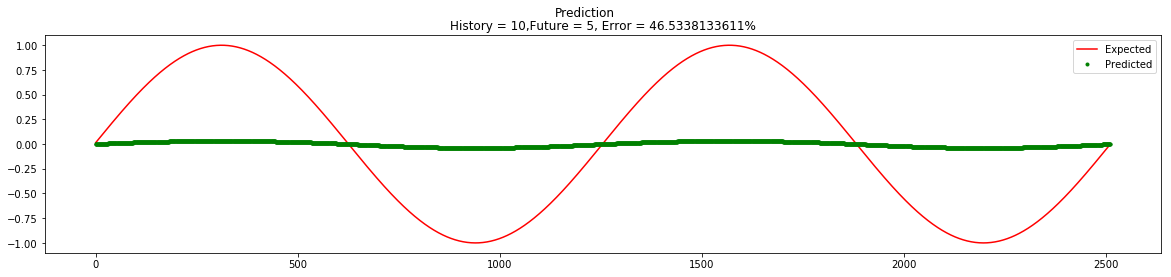

relu sgd


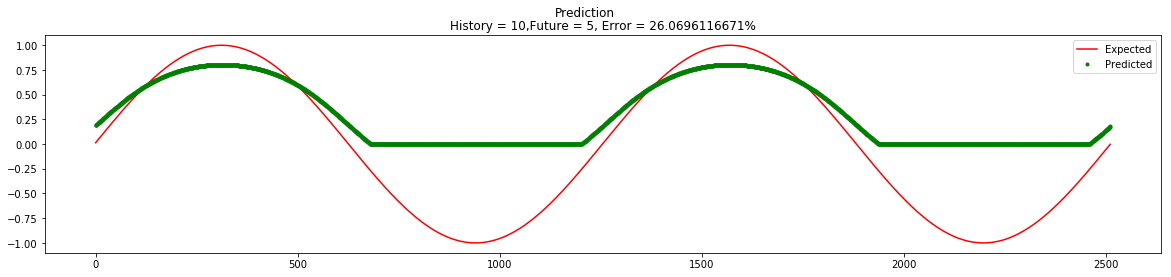

relu rmsprop


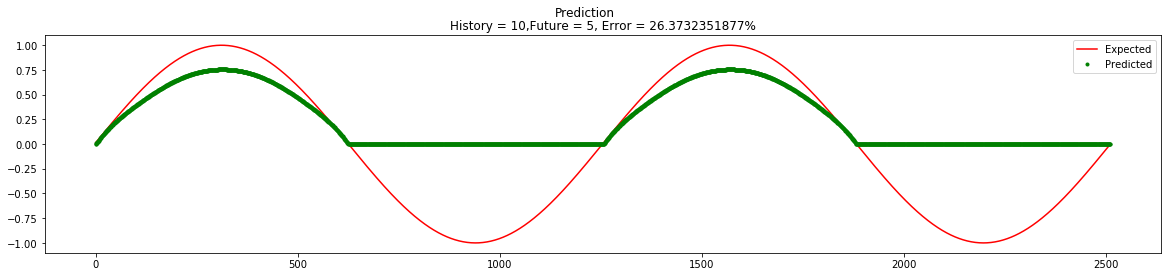

relu adam


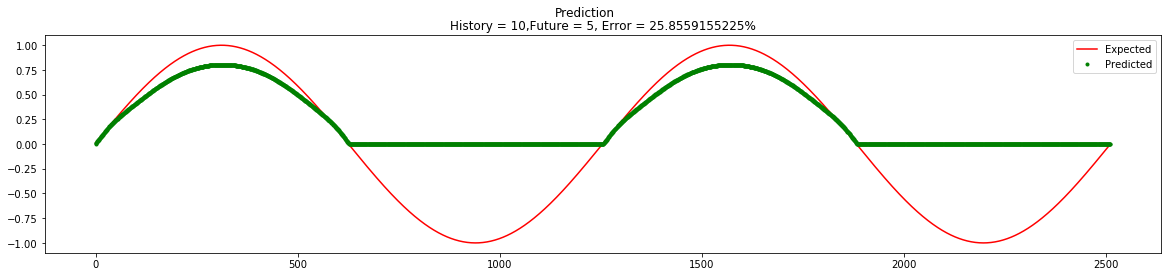

relu momentum


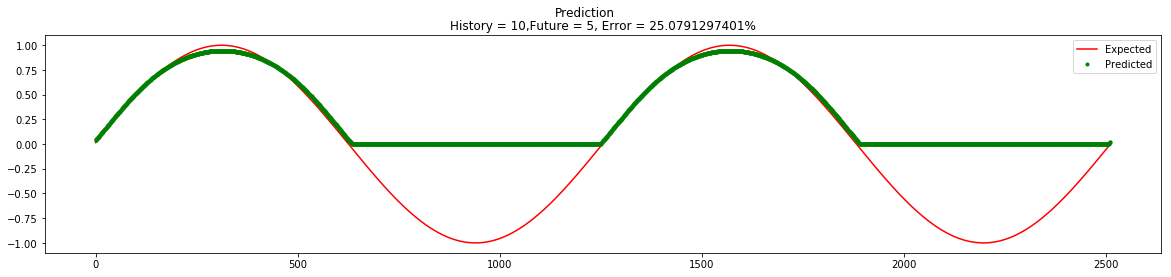

relu adagrad


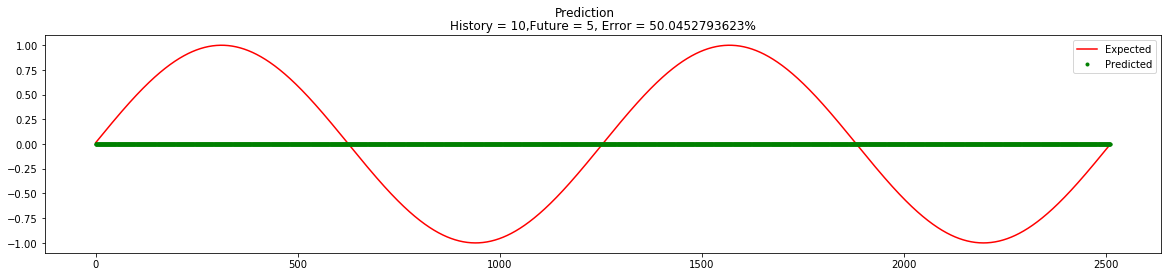

relu ftrl


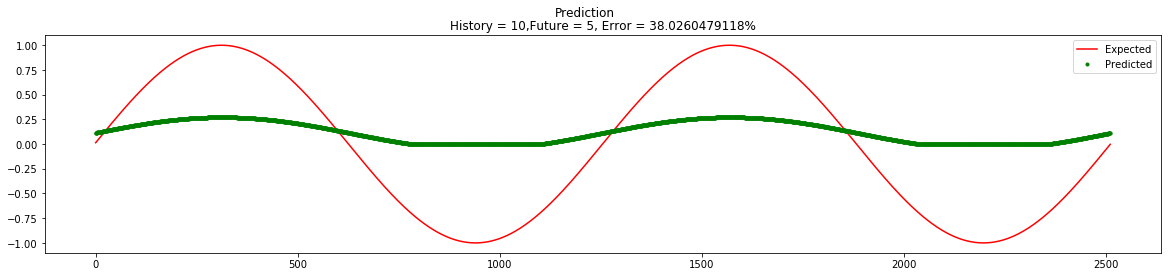

relu adadelta


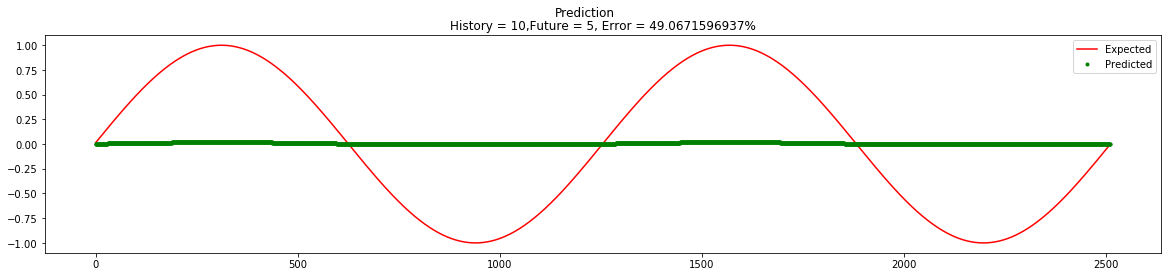

relu6 sgd


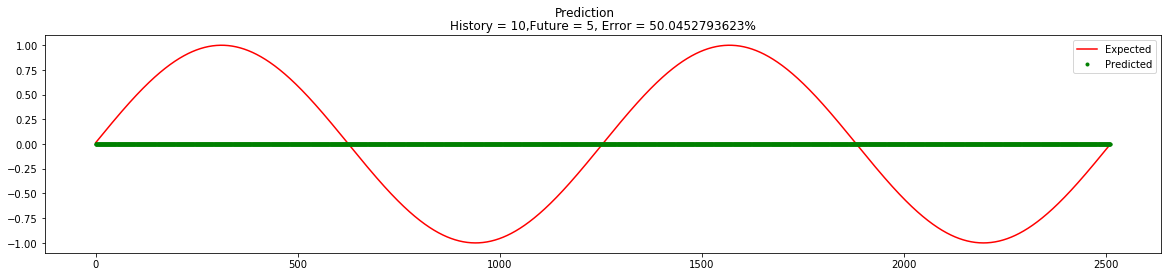

relu6 rmsprop


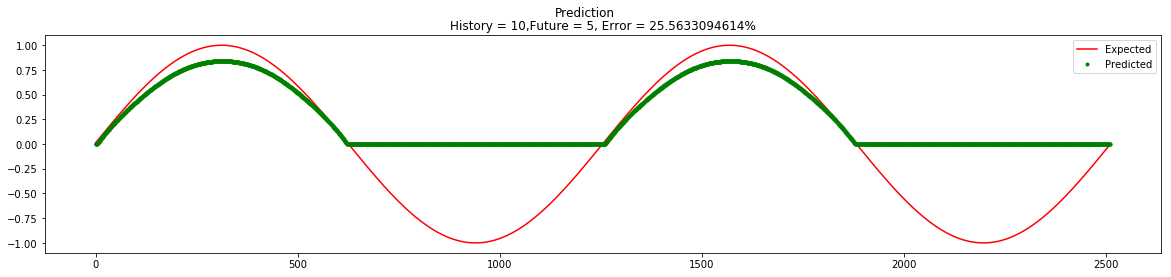

relu6 adam


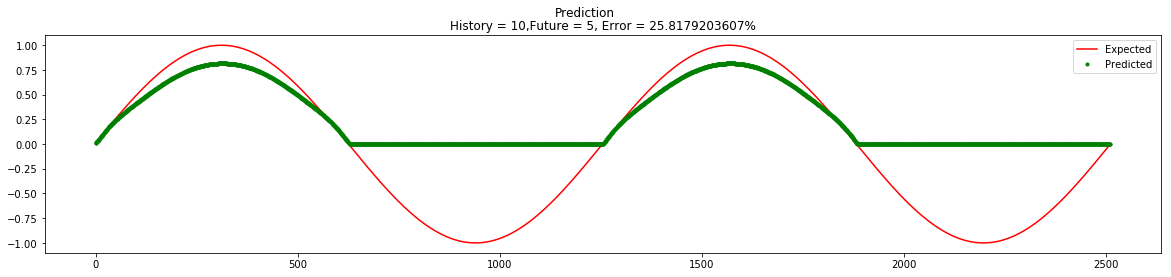

relu6 momentum


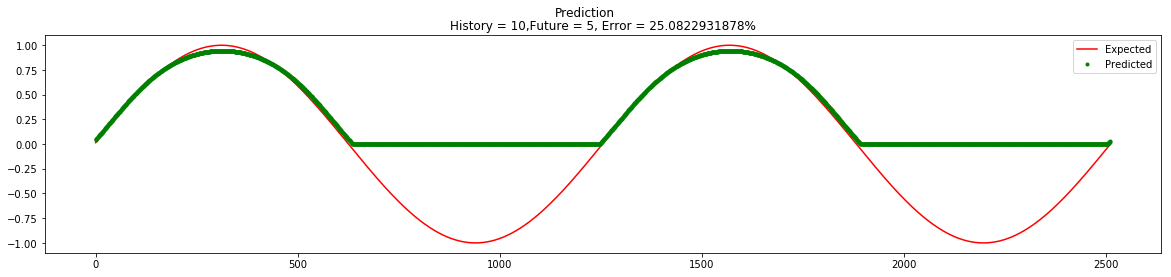

relu6 adagrad


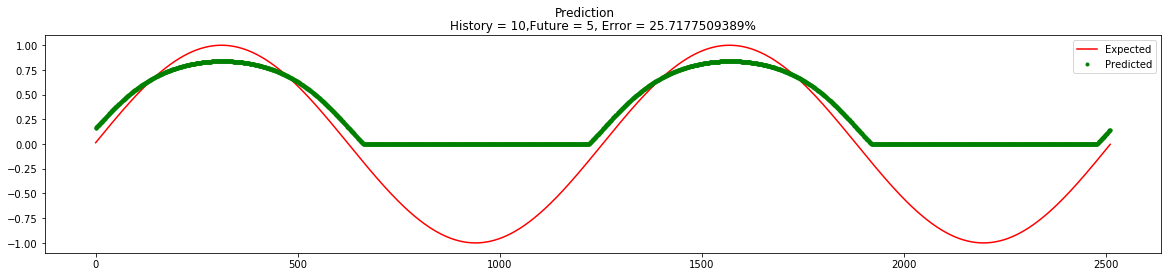

relu6 ftrl


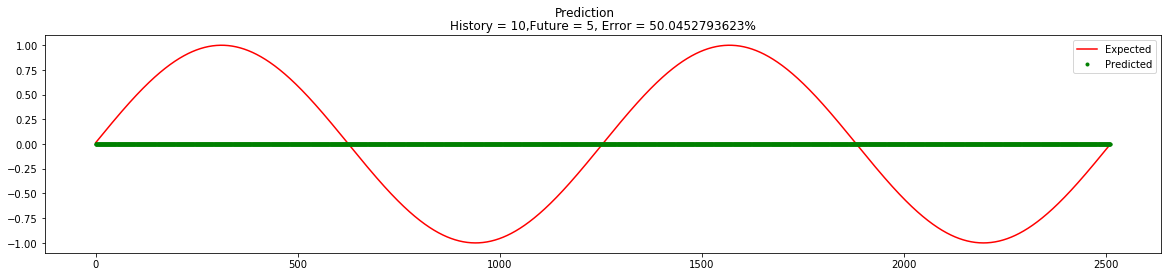

relu6 adadelta


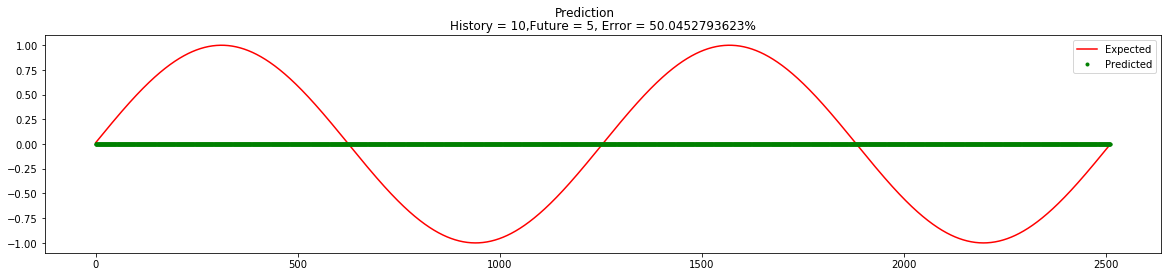

leaky_relu sgd


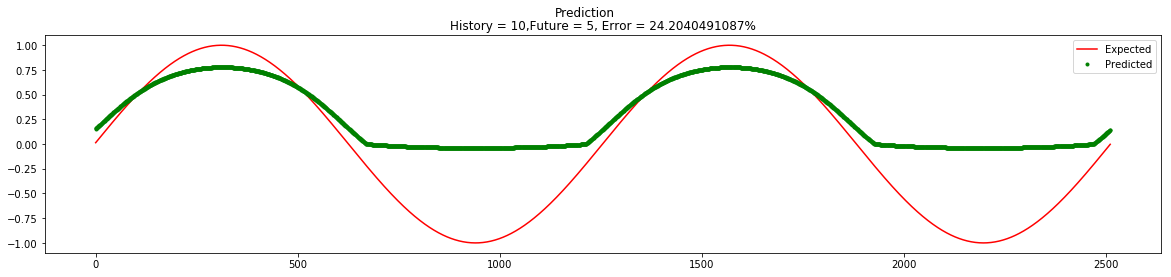

leaky_relu rmsprop


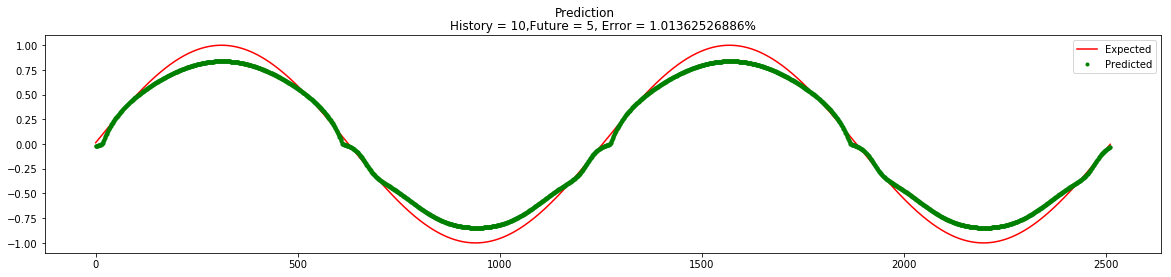

leaky_relu adam


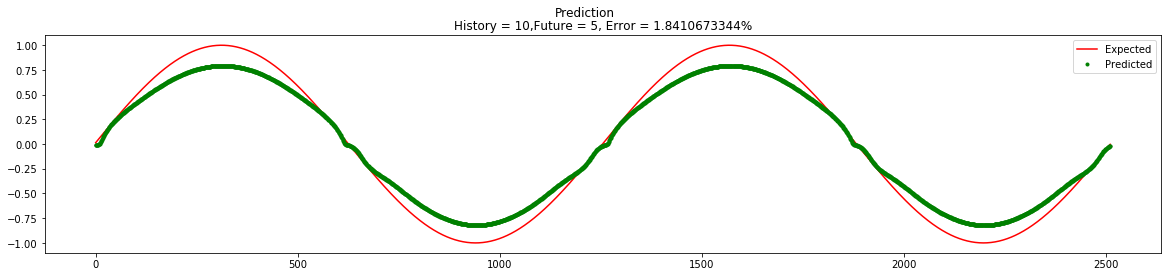

leaky_relu momentum


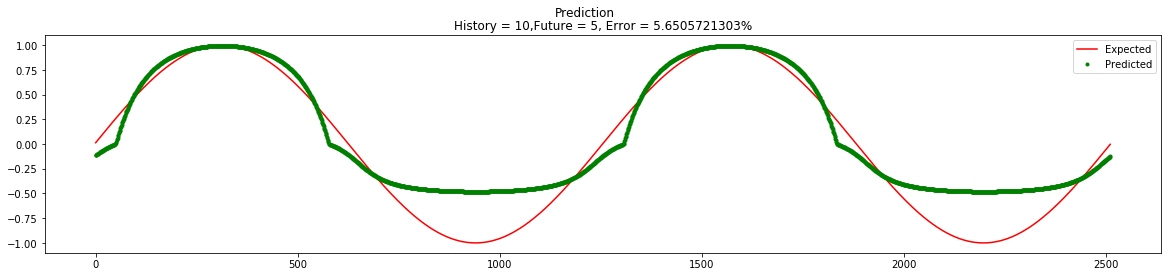

leaky_relu adagrad


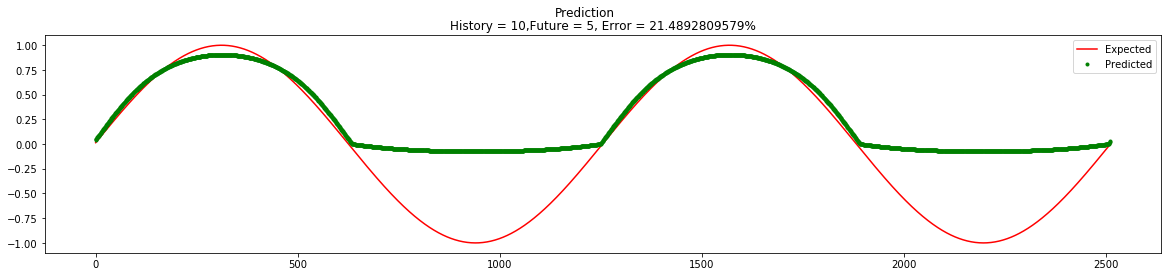

leaky_relu ftrl


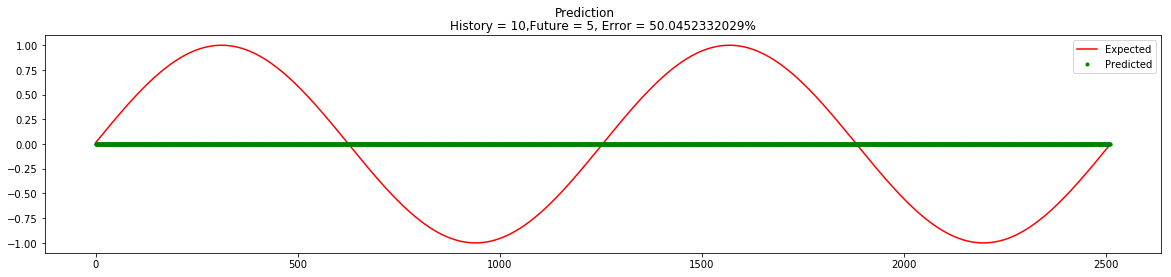

leaky_relu adadelta


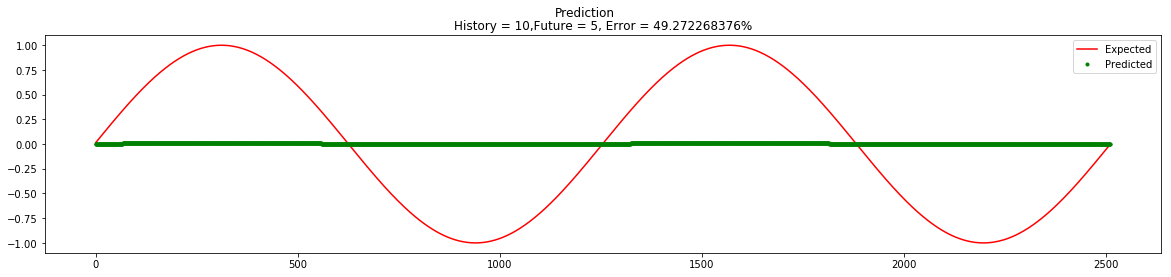

prelu sgd


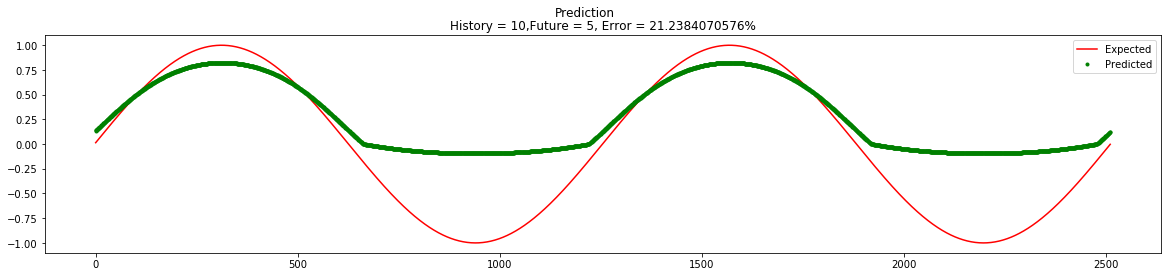

prelu rmsprop


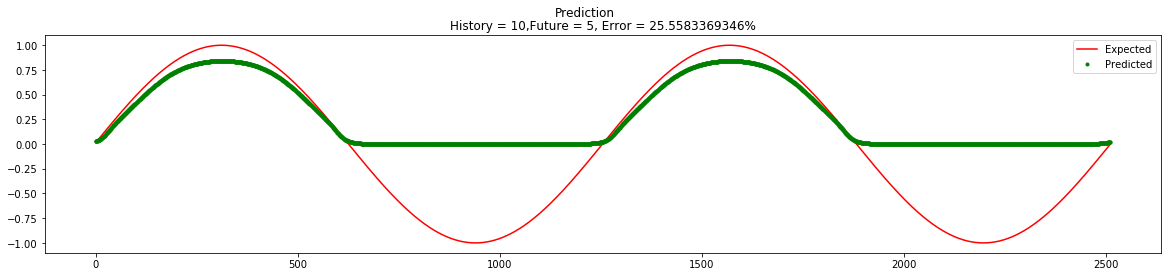

prelu adam


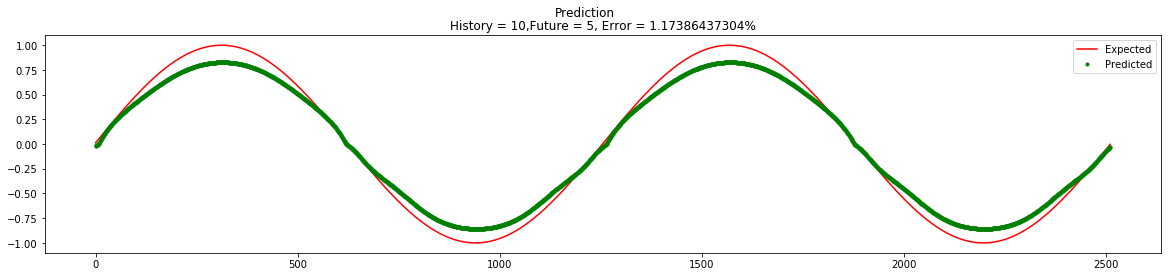

prelu momentum


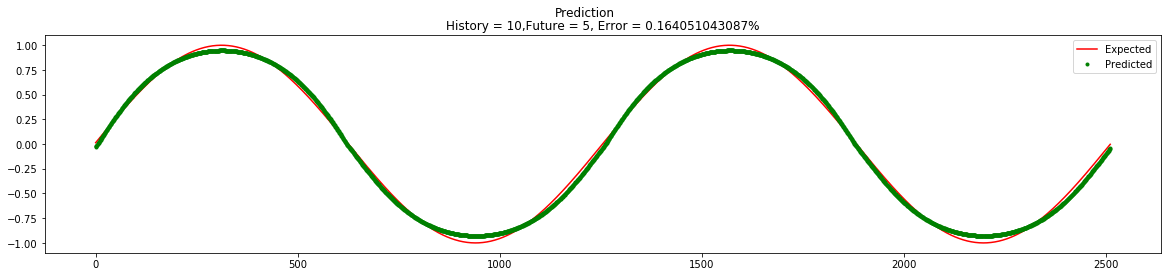

prelu adagrad


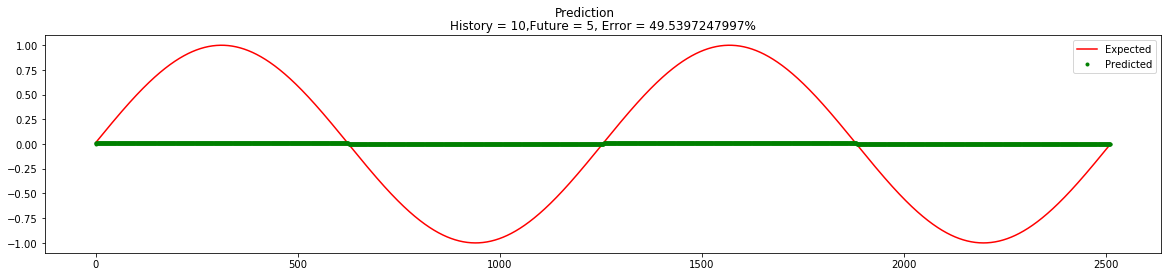

prelu ftrl


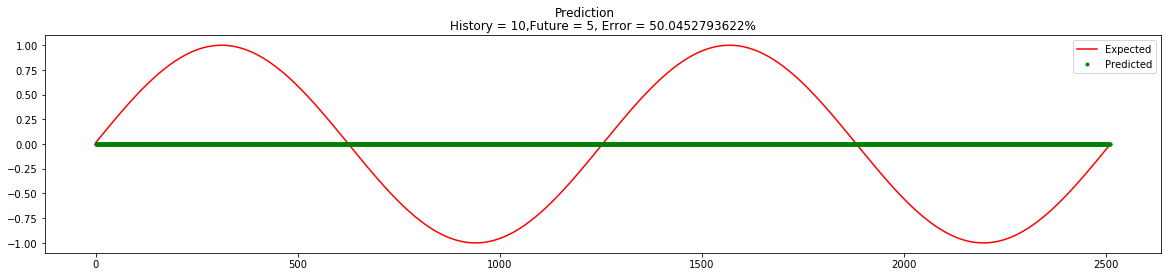

prelu adadelta


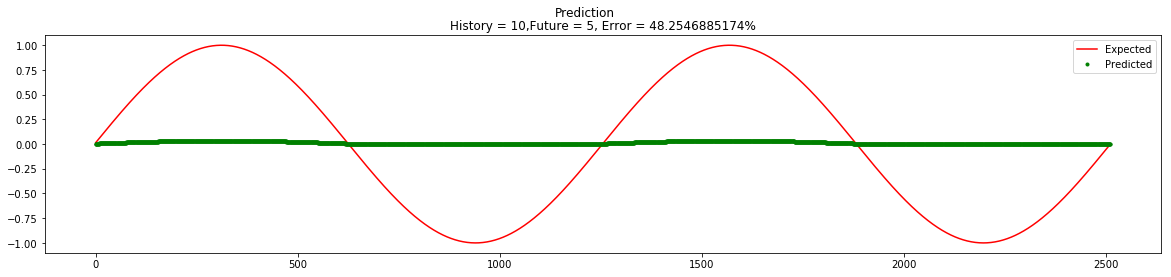

elu sgd


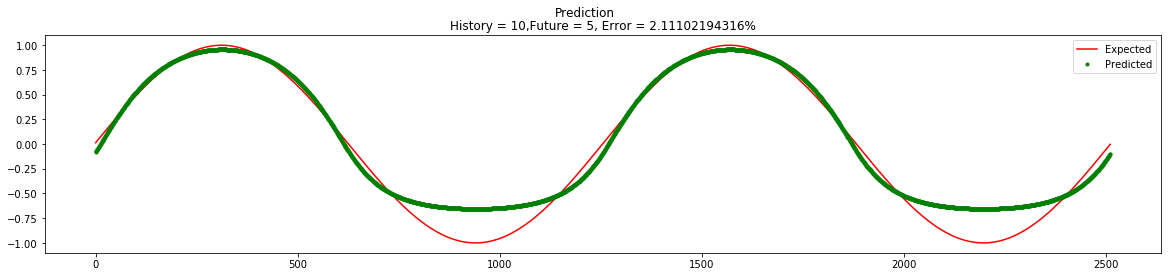

elu rmsprop


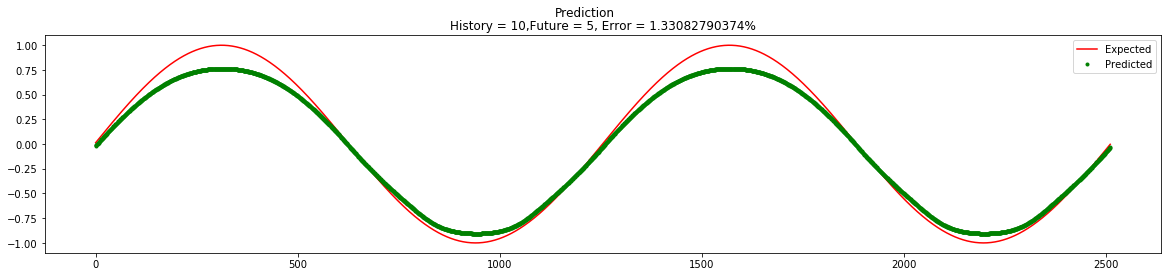

elu adam


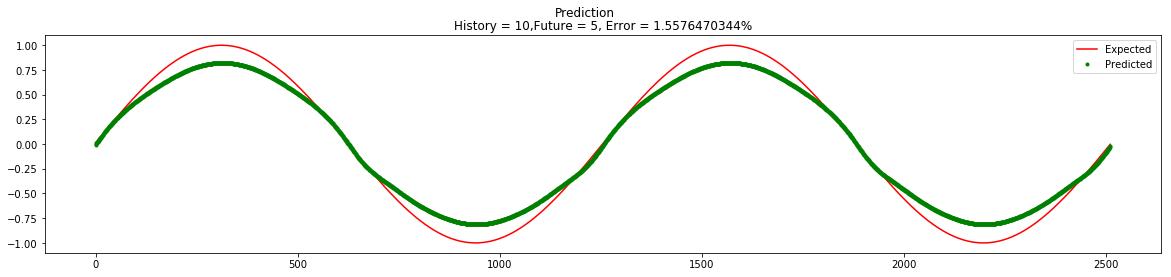

elu momentum


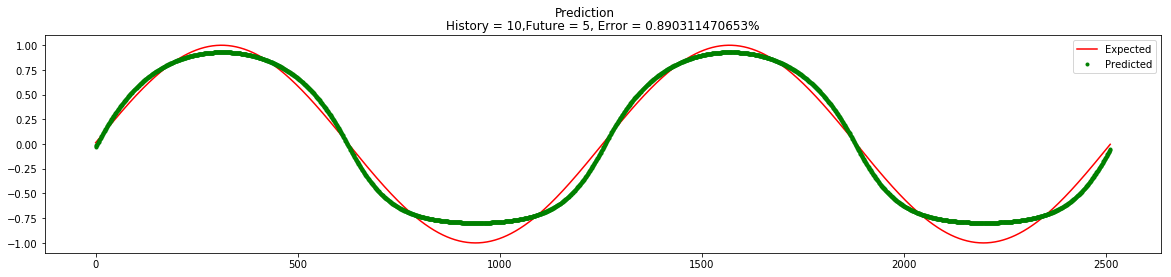

elu adagrad


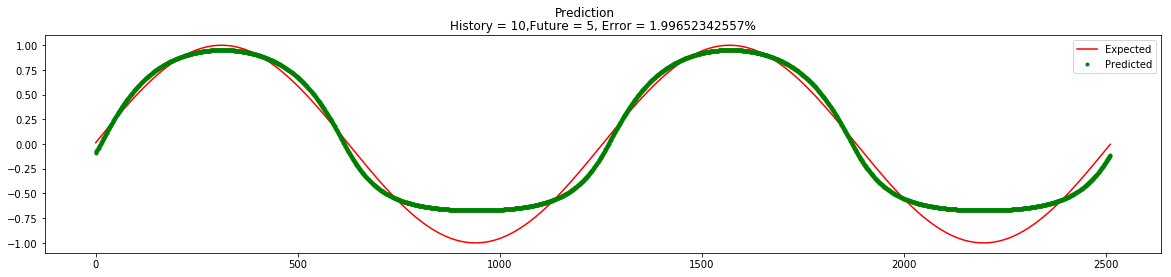

elu ftrl


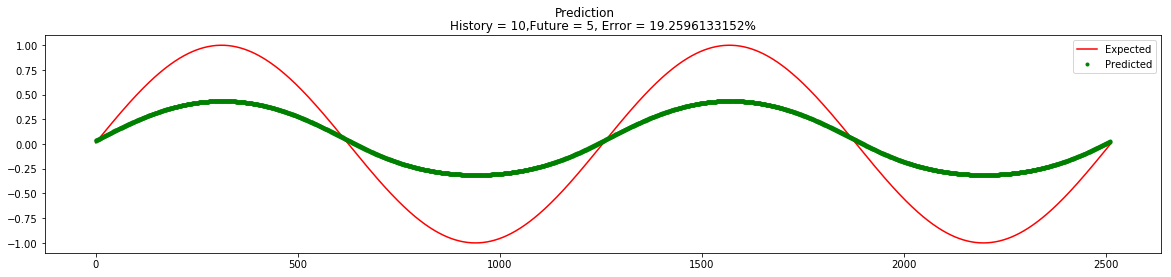

elu adadelta


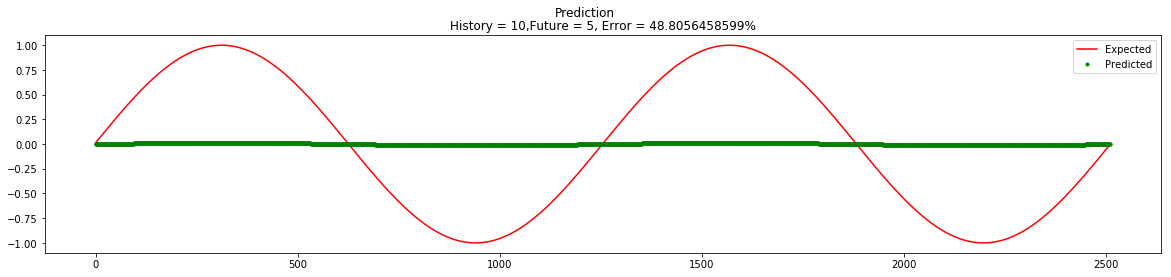

In [17]:
main()

In [21]:
# i like to do a simple function just to get a sneak peep.
def main():
    activators = ['linear','tanh']
    optimizers = ['sgd','rmsprop','adam','momentum','adagrad']
    errors = []
    testYs = []
    predictYs = []
    activatorss = []
    optimizerss = []
    
    for activator in activators:
        for optimizer in optimizers:
            print("Running for :" + activator + " & " + optimizer)
            error,testY,predictY=myRNN(activator, optimizer)
            errors.append(error)
            testYs.append(testY)
            predictYs.append(predictY)
            activatorss.append(activator)
            optimizerss.append(optimizer)
            
    for i in range(len(errors)):
        print(activatorss[i],optimizerss[i])
        plotFig(testYs[i],np.array(predictYs[i]).flatten(),errors[i])

Training Step: 4419  | total loss: 0.01731 | time: 9.975s
| AdaGrad | epoch: 010 | loss: 0.01731 - binary_acc: 0.0002 -- iter: 56448/56538
Training Step: 4420  | total loss: 0.01707 | time: 11.027s
| AdaGrad | epoch: 010 | loss: 0.01707 - binary_acc: 0.0002 | val_loss: 0.01200 - val_acc: 0.0000 -- iter: 56538/56538
--
linear sgd


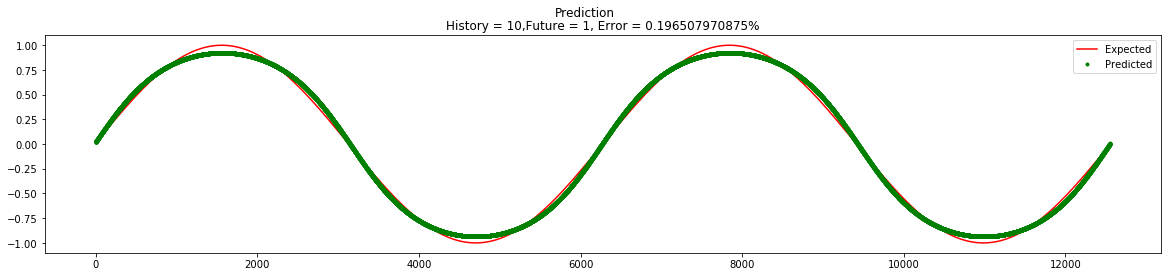

linear rmsprop


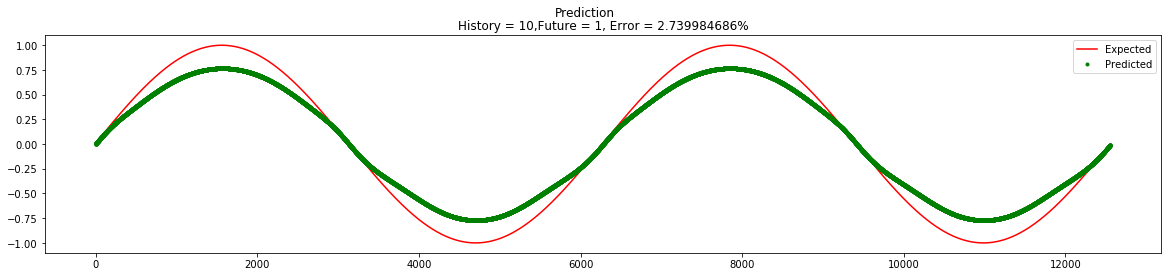

linear adam


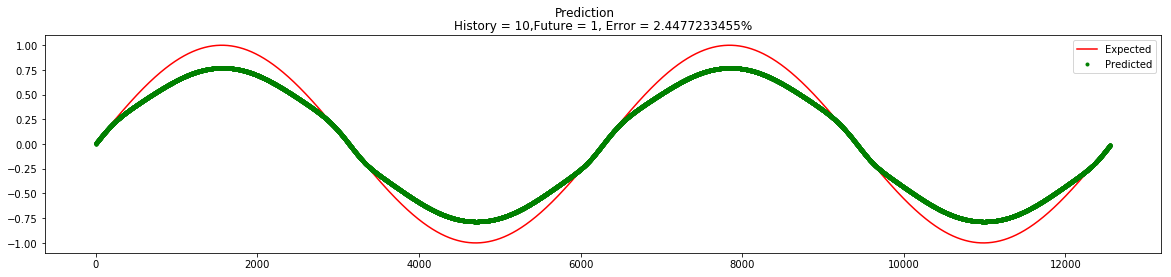

linear momentum


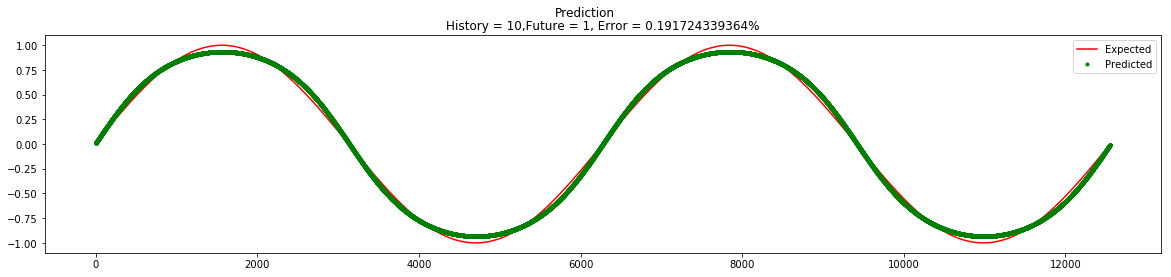

linear adagrad


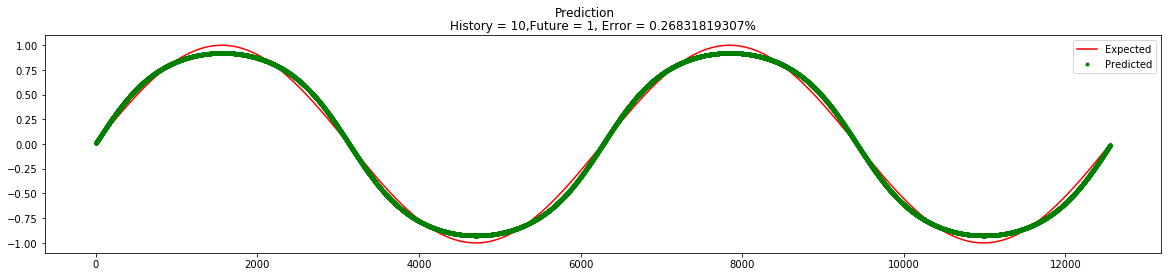

tanh sgd


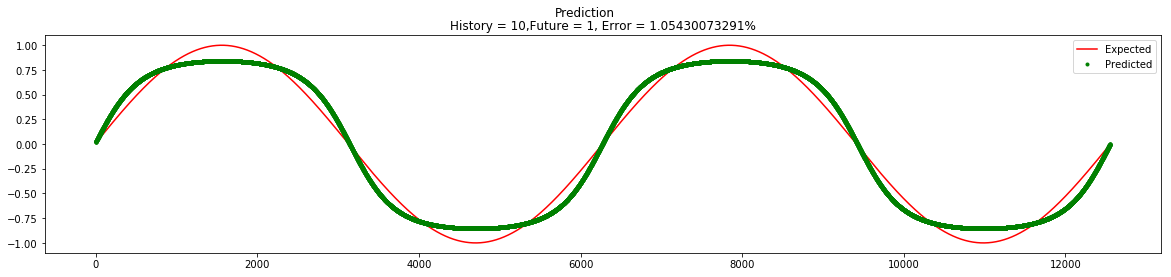

tanh rmsprop


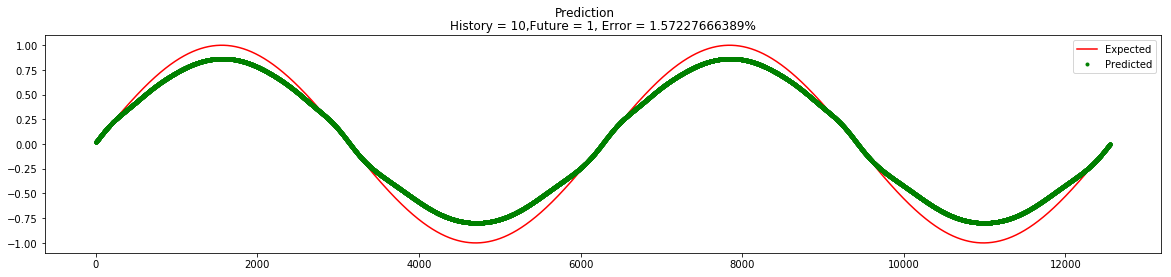

tanh adam


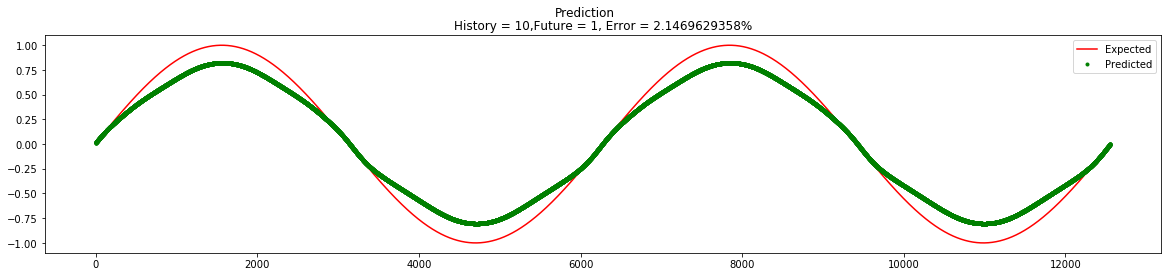

tanh momentum


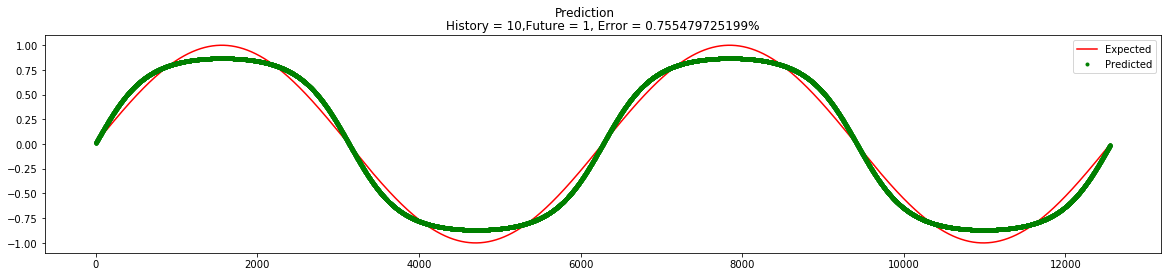

tanh adagrad


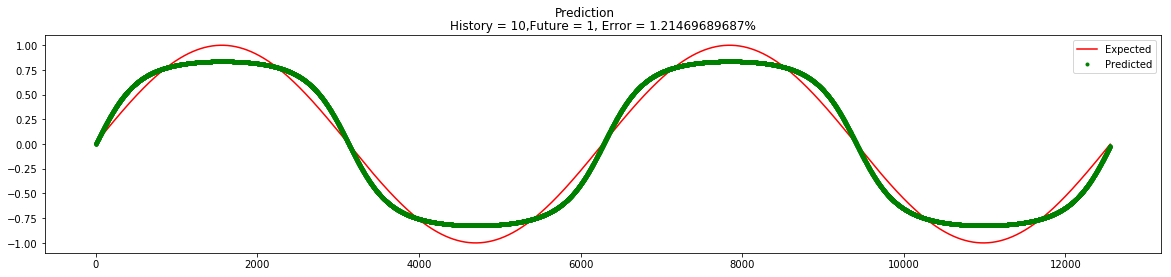

In [22]:
main()